In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil.relativedelta import relativedelta

plt.rcParams.update({'figure.max_open_warning': 0})
pd.options.mode.chained_assignment = None

In [2]:
input_file = '~/Repositories/covid-19-data/public/data/owid-covid-data.csv'

n = 16
group_one = ['USA', 'IND']
fig_size = (12, 4)
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'North America', 'Oceania', 'South America']

today = datetime.today().strftime('%Y-%m-%d')
two_days = (datetime.today()-relativedelta(days=2)).strftime('%Y-%m-%d')
one_day = (datetime.today()-relativedelta(days=1)).strftime('%Y-%m-%d')
one_month = (datetime.today()-relativedelta(months=1)).strftime('%Y-%m-%d')
three_months = (datetime.today()-relativedelta(months=3)).strftime('%Y-%m-%d')
six_months = (datetime.today()-relativedelta(months=6)).strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(months=12)).strftime('%Y-%m-%d')

last_day = two_days

graph_start_date = one_month

In [3]:
inp = pd.read_csv(input_file)

inp['new_tests_mean'] = inp['new_tests'].rolling(7).mean()
inp['new_cases_mean'] = inp['new_cases'].rolling(7).mean()
inp['new_deaths_mean'] = inp['new_deaths'].rolling(7).mean()
inp['new_vaccinations_mean'] = inp['new_vaccinations'].rolling(7).mean()

inp['new_tests_change_1w'] = inp['new_tests_mean'].pct_change(periods=6)*100
inp['new_cases_change_1w'] = inp['new_cases_mean'].pct_change(periods=6)*100
inp['new_deaths_change_1w'] = inp['new_deaths_mean'].pct_change(periods=6)*100
inp['new_vaccinations_change_1w'] = inp['new_vaccinations_mean'].pct_change(periods=6)*100

inp['cfr'] = (100*inp['total_deaths'].rolling(7).sum()/inp['total_cases'].rolling(7).sum()).round(2)
inp['cfr_current'] = (100*inp['new_deaths_mean'].rolling(7).sum()/inp['new_cases_mean'].rolling(7).sum()).round(2)
inp['ptr'] = (100*inp['total_cases'].rolling(7).sum()/inp['total_tests'].rolling(7).sum()).round(2)
inp['ptr_current'] = (100*inp['new_cases_mean'].rolling(7).sum()/inp['new_tests_mean'].rolling(7).sum()).round(2)
inp['date'] = pd.to_datetime(inp['date'])

print(inp.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [4]:
top_n = inp[(inp['date'] == last_day) & ~inp['location'].isin(continents) & (inp['total_cases'] >= 1000000)].sort_values(
    'total_cases', ascending=False)['iso_code'].tolist()

if len(top_n) > n-1:
    top_n = top_n[0:n]
    
print(top_n)

['OWID_WRL', 'USA', 'IND', 'BRA', 'FRA', 'TUR', 'RUS', 'GBR', 'ITA', 'DEU', 'ESP', 'ARG', 'COL', 'POL', 'IRN', 'MEX']


In [5]:
df = inp[(inp['iso_code'].isin(top_n)) & (inp['date'] == last_day)][[
    'date', 'iso_code', 'population',
    'total_tests', 'total_cases', 'total_deaths', 'total_vaccinations',
    'new_tests_mean', 'new_cases_mean', 'new_deaths_mean', 'new_vaccinations_mean',
    'people_vaccinated', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
    'cfr', 'new_tests_change_1w', 'new_cases_change_1w', 'new_deaths_change_1w', 'new_vaccinations_change_1w']]

df['total_cases_%_world'] = (df['total_cases']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_cases'])
df['total_deaths_%_world'] = (df['total_deaths']*100)/int(df[df['iso_code'] == 'OWID_WRL']['total_deaths'])
df['cases_1M_pop'] = ((df['total_cases']*1000000)/(df['population'])).astype(int)
df['deaths_1M_pop'] = ((df['total_deaths']*1000000)/(df['population'])).astype(int)
df['new_cases_%_world'] = (df['new_cases_mean']*100)/int(df[df['iso_code'] == 'OWID_WRL']['new_cases_mean'])
df['new_deaths_%_world'] = (df['new_deaths_mean']*100)/int(df[df['iso_code'] == 'OWID_WRL']['new_deaths_mean'])

df.sort_values('total_cases', ascending=False).set_index('iso_code')

,date,population,total_tests,total_cases,total_deaths,total_vaccinations,new_tests_mean,new_cases_mean,new_deaths_mean,new_vaccinations_mean,...,new_tests_change_1w,new_cases_change_1w,new_deaths_change_1w,new_vaccinations_change_1w,total_cases_%_world,total_deaths_%_world,cases_1M_pop,deaths_1M_pop,new_cases_%_world,new_deaths_%_world
iso_code,,,,,,,,,,,,,,,,,,,,,
OWID_WRL,2021-05-23,7.794799e+09,NaN,166862060.0,3464212.0,1.675814e+09,NaN,593744.285714,12098.000000,2.813024e+07,...,0.000000,-10.759717,-1.771195,10.912048,100.000000,100.000000,21406,444,100.000048,100.000000
USA,2021-05-23,3.310026e+08,NaN,33117737.0,589893.0,2.857206e+08,NaN,25270.142857,535.142857,1.827882e+06,...,-25.346607,-21.121303,-9.209889,-0.135375,19.847374,17.028202,100052,1782,4.256067,4.423399
IND,2021-05-23,1.380004e+09,328607937.0,26752447.0,303720.0,1.917192e+08,NaN,255283.428571,4190.000000,NaN,...,0.000000,-20.098333,2.099071,-25.107526,16.032672,8.767362,19385,220,42.995538,34.633824
BRA,2021-05-23,2.125594e+08,NaN,16083258.0,449068.0,5.774711e+07,NaN,65145.000000,1902.428571,7.107780e+05,...,0.000000,1.925342,0.067628,-20.507079,9.638655,12.963063,75664,2112,10.971900,15.725149
FRA,2021-05-23,6.756425e+07,NaN,5665101.0,108757.0,3.280094e+07,NaN,12880.571429,140.000000,5.125689e+05,...,10.474407,-10.531173,-13.120567,2.951876,3.395080,3.139444,83847,1609,2.169381,1.157216
TUR,2021-05-23,8.433907e+07,52377678.0,5186487.0,46268.0,2.804873e+07,215397.428571,9873.285714,215.428571,3.251406e+05,...,2.380209,-16.340241,-9.808612,143.980207,3.108248,1.335600,61495,548,1.662886,1.780696
RUS,2021-05-23,1.459345e+08,135989328.0,4944129.0,116497.0,2.647251e+07,310026.571429,8627.857143,367.142857,3.574537e+05,...,2.953028,0.693576,1.862862,8.723892,2.963004,3.362872,33879,798,1.453127,3.034740
GBR,2021-05-23,6.788600e+07,173297678.0,4478390.0,127983.0,6.096559e+07,891743.000000,1685.857143,6.000000,5.676456e+05,...,2.882598,-24.478433,-44.736842,7.913775,2.683888,3.694433,65969,1885,0.283937,0.049595
ITA,2021-05-23,6.046183e+07,64558486.0,4192183.0,125225.0,3.092703e+07,236545.571429,4723.000000,152.714286,4.853534e+05,...,-7.731559,-28.576984,-15.494071,-0.370574,2.512364,3.614819,69336,2071,0.795461,1.262310


<AxesSubplot:title={'center':'World total vaccinations'}, xlabel='date'>

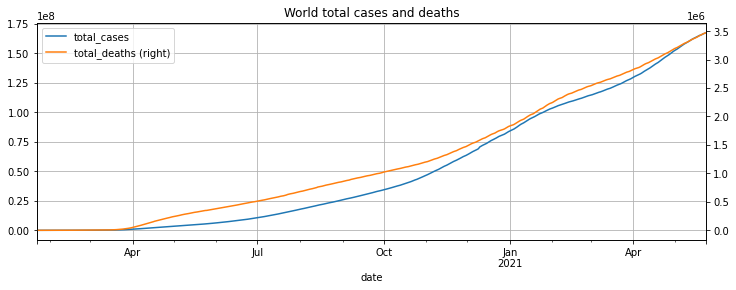

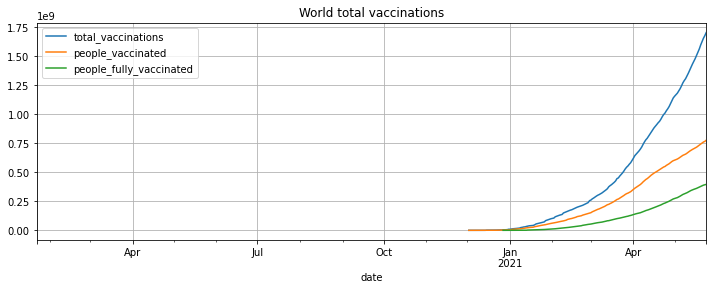

In [6]:
inp[(inp['iso_code'] == 'OWID_WRL')].plot(
    x='date', y=['total_cases', 'total_deaths'],
    secondary_y=['total_deaths'],
    style=['-', '-'], figsize=fig_size, grid=True, title='World total cases and deaths')

inp[(inp['iso_code'] == 'OWID_WRL')].plot(
    x='date', y=['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated'],
    style=['-', '-', '-'], figsize=fig_size, grid=True, title='World total vaccinations')

<AxesSubplot:title={'center':'People vaccinated per hundred'}, xlabel='iso_code'>

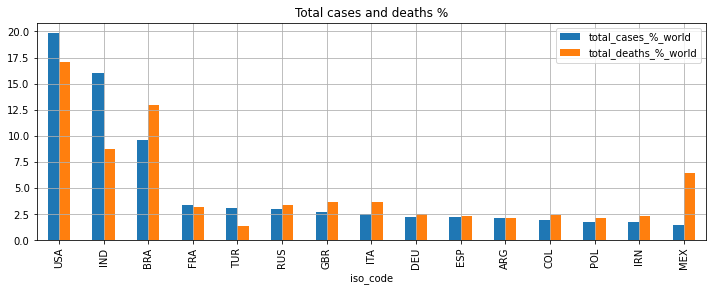

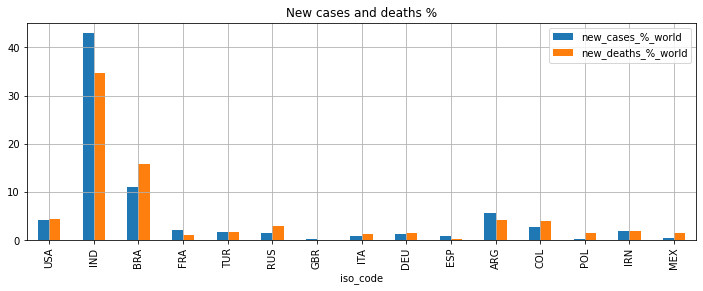

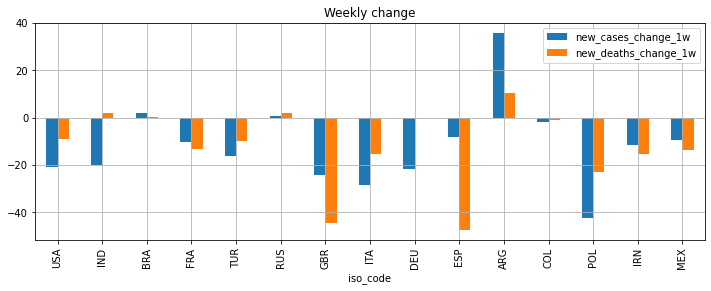

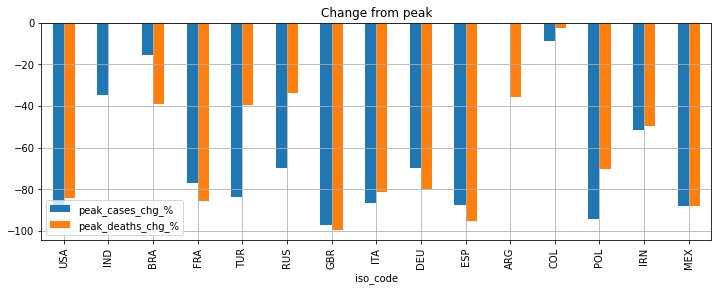

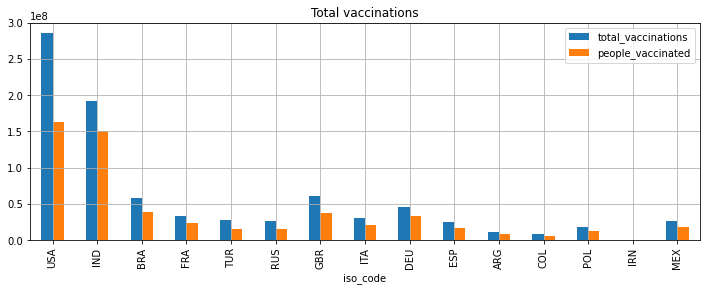

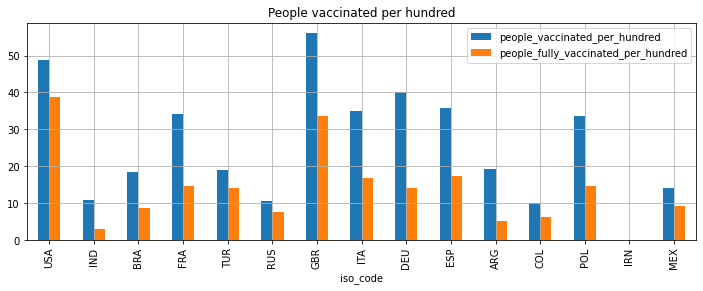

In [7]:
df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['total_cases_%_world', 'total_deaths_%_world'],
    kind='bar', figsize=fig_size, grid=True, title='Total cases and deaths %')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['new_cases_%_world', 'new_deaths_%_world'],
    kind='bar', figsize=fig_size, grid=True, title='New cases and deaths %')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['new_cases_change_1w', 'new_deaths_change_1w'],
    kind='bar', figsize=fig_size, grid=True, title='Weekly change')

df_max = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] <= last_day)].groupby('iso_code')[['new_cases_mean', 'new_deaths_mean']].max()
df_last = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)][['iso_code', 'new_cases_mean', 'new_deaths_mean']].set_index('iso_code')
df_pct_chg_max = ((df_last-df_max)*100/df_max)
df_pct_chg_max['total_cases'] = inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].set_index('iso_code')['total_cases']
df_pct_chg_max = df_pct_chg_max.rename(columns={'new_cases_mean': 'peak_cases_chg_%','new_deaths_mean': 'peak_deaths_chg_%'})

df_pct_chg_max.sort_values(by='total_cases', ascending=False).plot(
    y=['peak_cases_chg_%', 'peak_deaths_chg_%'],
    kind='bar', figsize=fig_size, grid=True, title='Change from peak')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['total_vaccinations', 'people_vaccinated'],
    kind='bar', figsize=fig_size, grid=True, title='Total vaccinations')

df[df['iso_code'] != 'OWID_WRL'].sort_values('total_cases_%_world', ascending=False).plot(
    x='iso_code', y=['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'],
    kind='bar', figsize=fig_size, grid=True, title='People vaccinated per hundred')

<AxesSubplot:title={'center':'Top new vaccinations change'}, xlabel='iso_code'>

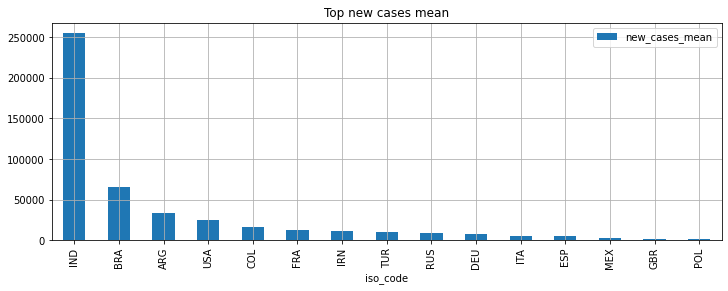

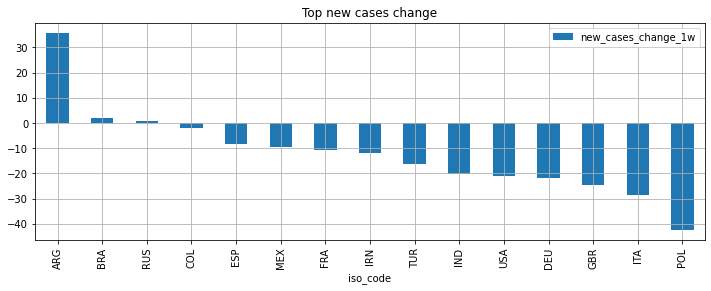

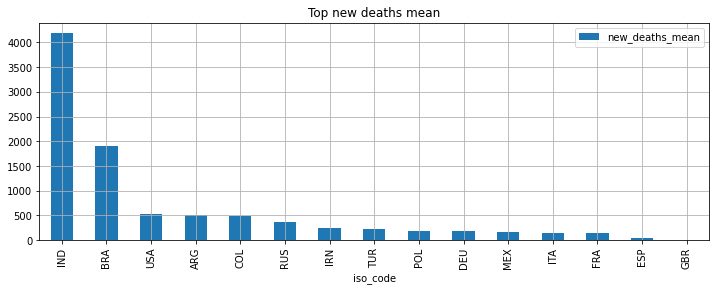

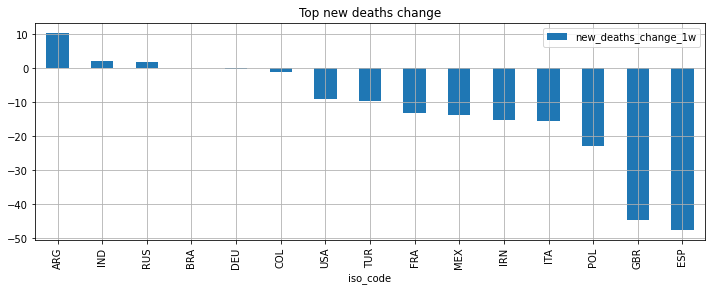

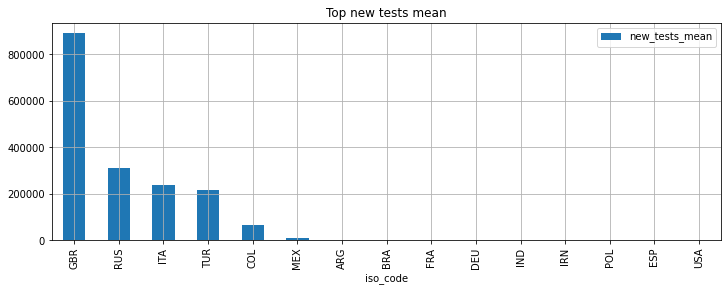

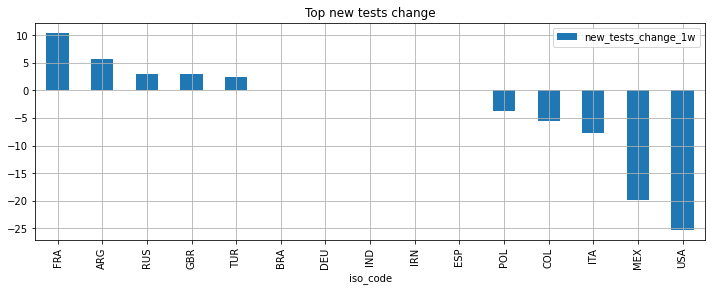

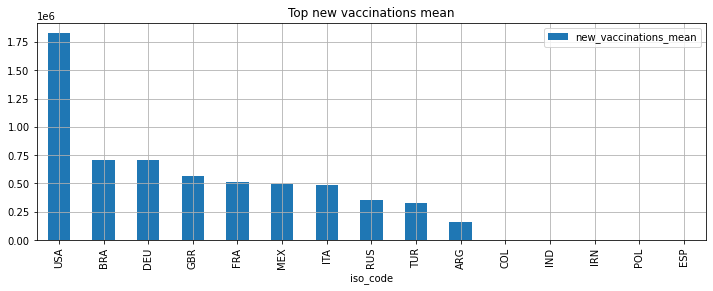

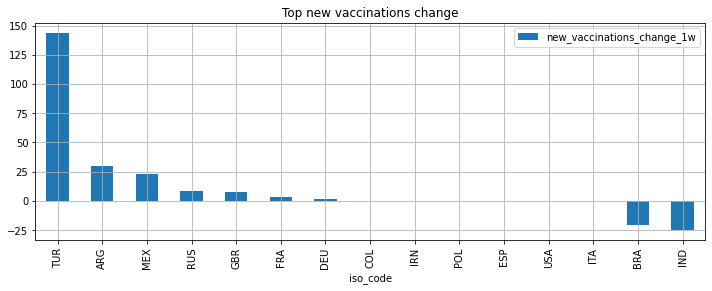

In [8]:
inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_cases_mean', ascending=False).head(n).plot(
    x='iso_code', y=['new_cases_mean'], kind='bar',
    figsize=fig_size, grid=True, title='Top new cases mean')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_cases_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['new_cases_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top new cases change')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_deaths_mean', ascending=False).head(n).plot(
    x='iso_code', y=['new_deaths_mean'], kind='bar',
    figsize=fig_size, grid=True, title='Top new deaths mean')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_deaths_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['new_deaths_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top new deaths change')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_tests_mean', ascending=False).head(n).plot(
    x='iso_code', y=['new_tests_mean'], kind='bar',
    figsize=fig_size, grid=True, title='Top new tests mean')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_tests_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['new_tests_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top new tests change')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_vaccinations_mean', ascending=False).head(n).plot(
    x='iso_code', y=['new_vaccinations_mean'], kind='bar',
    figsize=fig_size, grid=True, title='Top new vaccinations mean')

inp[(inp['iso_code'].isin(top_n)) & (inp['iso_code'] != 'OWID_WRL') & (inp['date'] == last_day)].sort_values(
    by='new_vaccinations_change_1w', ascending=False).head(n).plot(
    x='iso_code', y=['new_vaccinations_change_1w'], kind='bar',
    figsize=fig_size, grid=True, title='Top new vaccinations change')

In [9]:
def plot_all(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code)].plot(
        x='date', y=['new_cases_mean', 'new_deaths_mean', 'hosp_patients'],
        secondary_y=['new_deaths_mean'],
        style=['-', '-', '--'], figsize=fig_size, grid=True, title=country+' (cases and deaths)')
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y=['new_cases_mean', 'new_deaths_mean', 'hosp_patients', 'new_cases', 'new_deaths'],
        secondary_y=['new_deaths_mean', 'new_deaths'],
        style=['-', '-', '--', 'o', 'o'], figsize=fig_size, grid=True, title=country+' (recent cases and deaths)')
    
    df[(df['iso_code'] == iso_code)].plot(
        x='date', y=['new_vaccinations_mean'],
        style=['-'], figsize=fig_size, grid=True, title=country+' (vaccinations)')
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y=['new_vaccinations_mean', 'new_vaccinations'],
        style=['-', 'o'], figsize=fig_size, grid=True, title=country+' (recent vaccinations)')
    
    df[(df['iso_code'] == iso_code)].plot(
        x='date', y=['new_tests_mean'],
        style=['-'], figsize=fig_size, grid=True, title=country+' (tests)')
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y=['new_tests_mean', 'new_tests'],
        style=['-', 'o'], figsize=fig_size, grid=True, title=country+' (recent tests)')

    
def plot_cfr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y='cfr', style = ['--'], figsize=fig_size, grid=True, title=country)
    
def plot_ptr(df, iso_code='USA'):
    df[(df['iso_code'] == iso_code) & (df['date'] >= graph_start_date)].plot(
        x='date', y='ptr',
        style = ['--'], figsize=fig_size, grid=True, title=country)

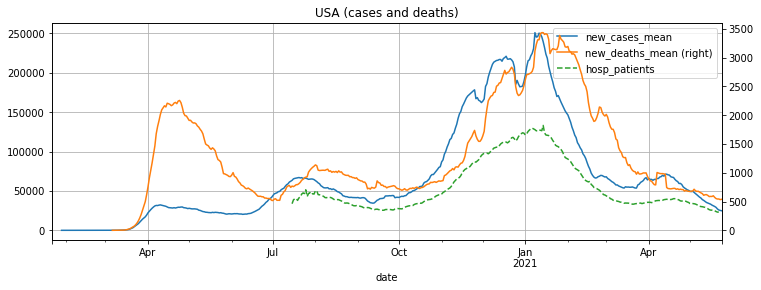

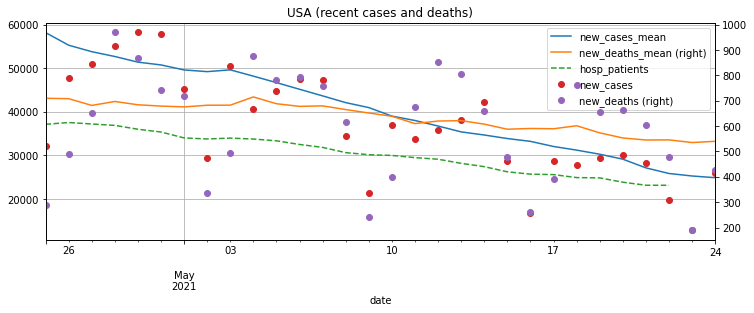

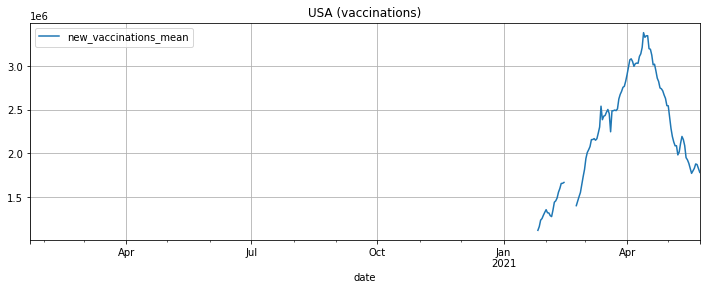

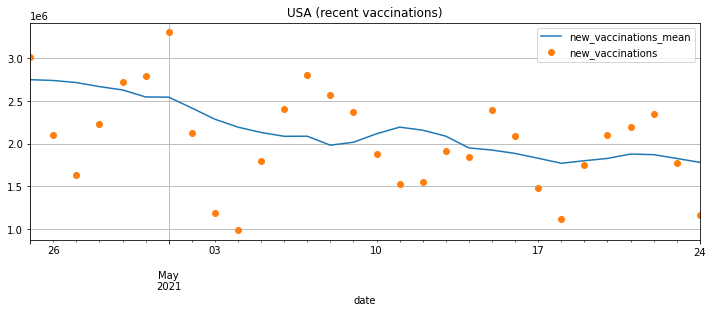

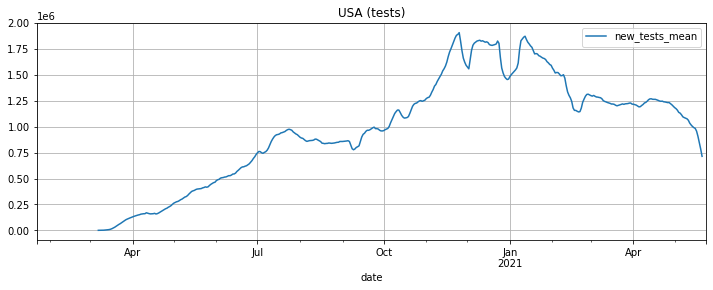

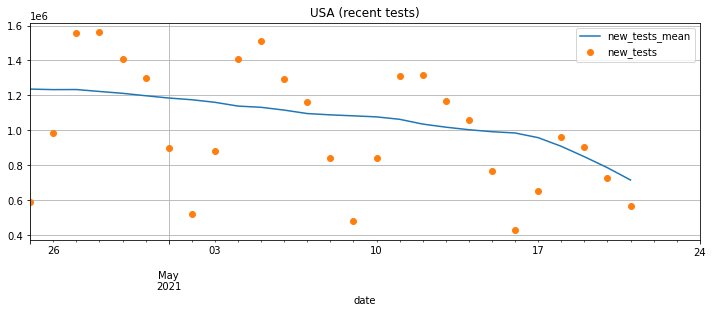

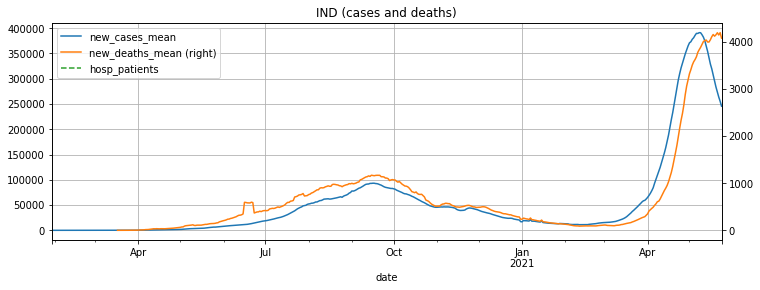

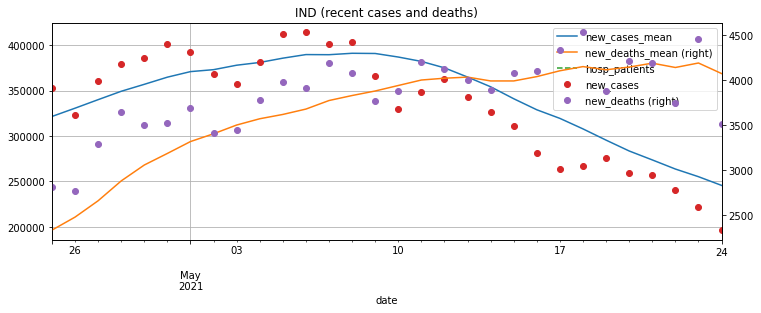

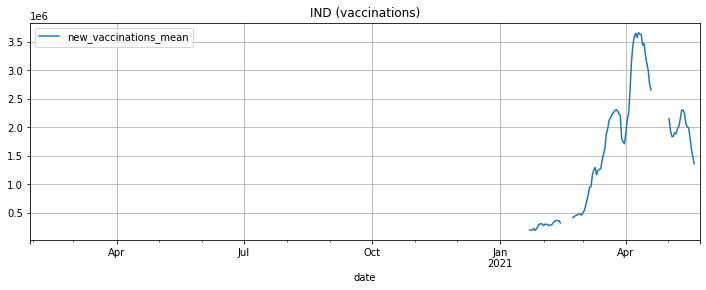

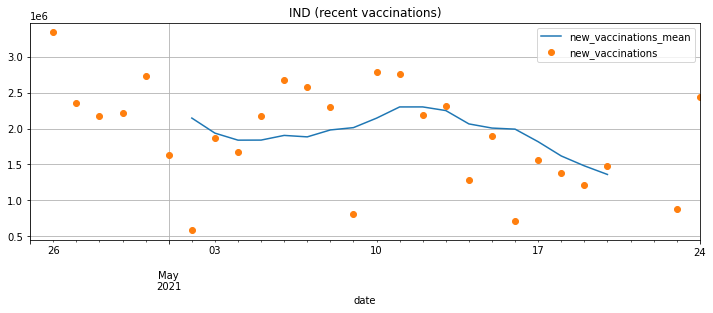

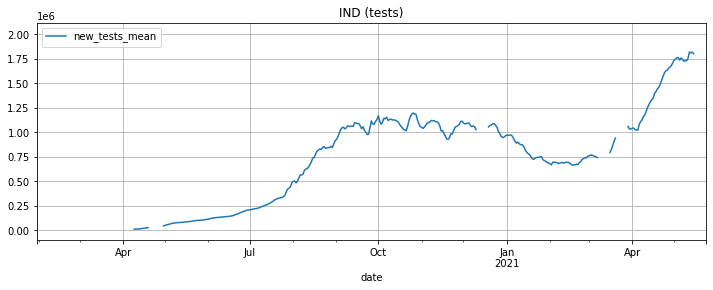

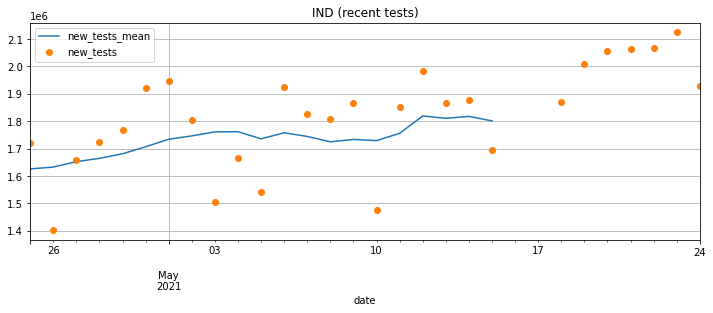

In [10]:
for country in group_one:
    plot_all(inp, iso_code=country)

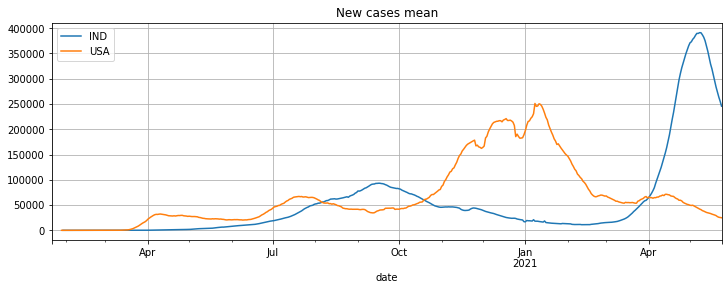

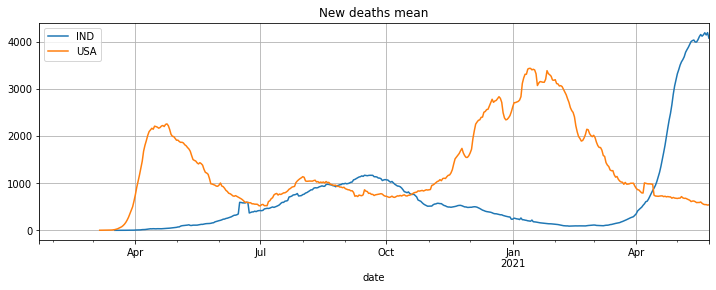

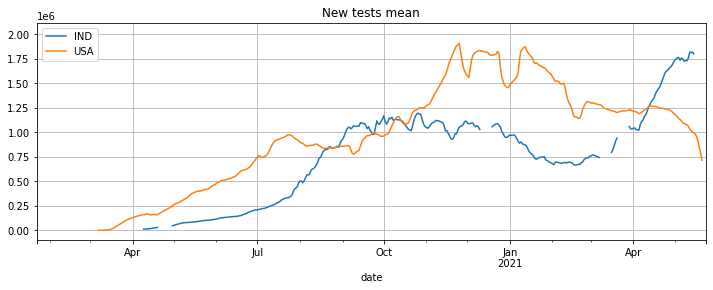

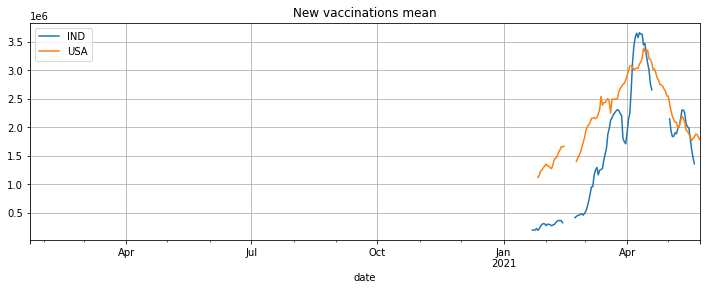

In [11]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['new_cases_mean'], style = ['-'],
    figsize=fig_size, grid=True, ax=axes, title='New cases mean')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['new_deaths_mean'], style = ['-'],
    figsize=fig_size, grid=True, ax=axes, title='New deaths mean')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['new_tests_mean'], style = ['-'],
    figsize=fig_size, grid=True, ax=axes, title='New tests mean')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['new_vaccinations_mean'], style = ['-'],
    figsize=fig_size, grid=True, ax=axes, title='New vaccinations mean')
axes.legend(list(sorted(group_one)))

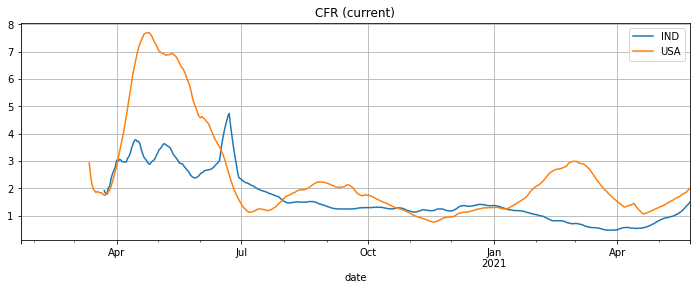

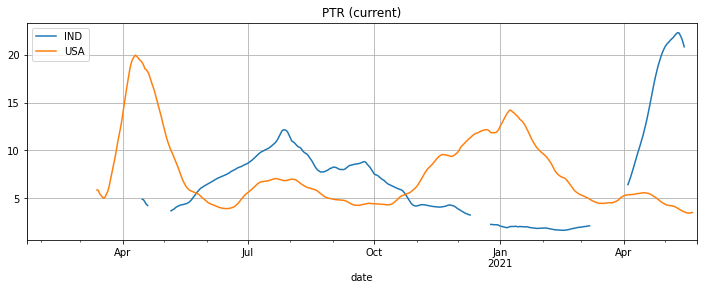

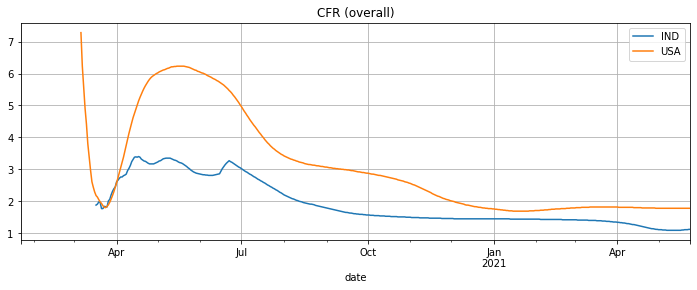

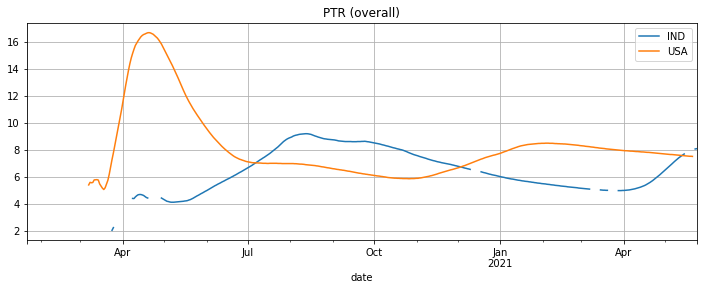

In [12]:
fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['cfr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR (current)')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['ptr_current'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR (current)')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['cfr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='CFR (overall)')
axes.legend(list(sorted(group_one)))

fig, axes = plt.subplots(sharex=True)
inp[(inp['iso_code'].isin(group_one))].groupby('iso_code').plot(
    x='date', y=['ptr'], style = ['-'], figsize=fig_size, grid=True, ax=axes, title='PTR (overall)')
axes.legend(list(sorted(group_one)))

<AxesSubplot:title={'center':'Continents totals'}, xlabel='location'>

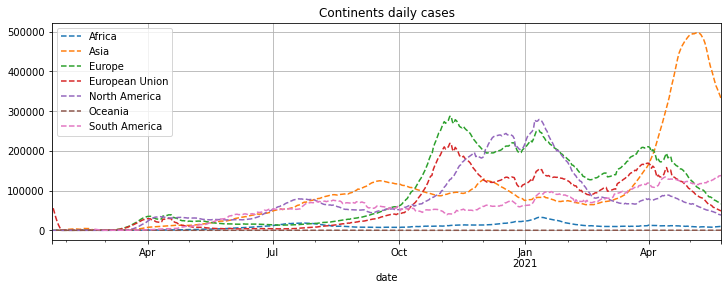

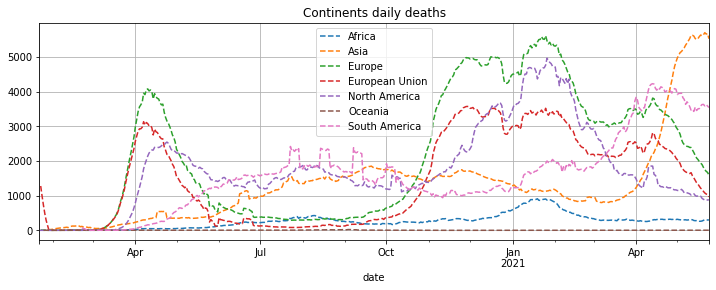

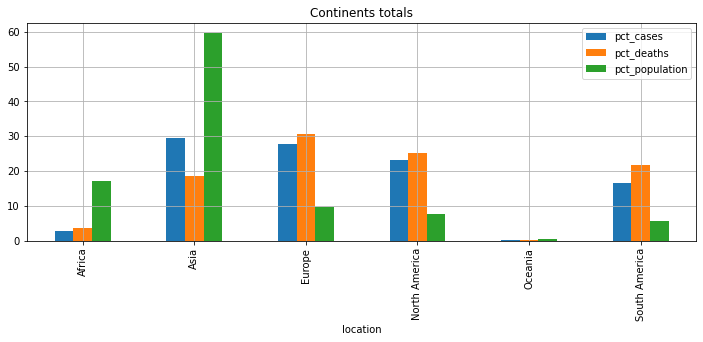

In [13]:
inp_continents = inp[inp['location'].isin(continents)]

fig, axes = plt.subplots(sharex=True)

for c in continents:
    inp_continents[inp_continents['location'] == c].plot(
        x='date', y='new_cases_mean', style=['--'],
        figsize=fig_size, grid=True, ax=axes, title='Continents daily cases')

axes.legend(list(sorted(continents)))

fig, axes = plt.subplots(sharex=True)

for c in continents:
    inp_continents[inp_continents['location'] == c].plot(
        x='date', y='new_deaths_mean', style=['--'],
        figsize=fig_size, grid=True, ax=axes, title='Continents daily deaths')
    
axes.legend(list(sorted(continents)))

inp_continents_current = inp_continents[(inp_continents['location'] != 'European Union') &
                                        (inp_continents['date'] == last_day)]

inp_continents_current['pct_cases'] = inp_continents_current['total_cases']*100/inp_continents_current['total_cases'].sum()
inp_continents_current['pct_deaths'] = inp_continents_current['total_deaths']*100/inp_continents_current['total_deaths'].sum()
inp_continents_current['pct_population'] = [17.2, 59.54, 9.59, 7.6, 0.55, 5.53]

inp_continents_current.plot(
    x='location', y=['pct_cases', 'pct_deaths', 'pct_population'],
    kind='bar', figsize=fig_size, grid=True, title='Continents totals')